In [1]:
import nibabel as nib #pip install nibabel
import h5py #pip install h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from scipy.spatial import ConvexHull
import json
from glob import glob
import os

In [2]:
import numpy as np
import nibabel as nib
from dipy.segment.clustering import QuickBundles
from dipy.io.pickles import save_pickle

trkdir = '/Users/kjordan/Desktop/SECOND_PAPER/CCI_demo/final_1/BA_Ex_Capsule_L.trk.trk'
trk,hdr = nib.trackvis.read(trkdir)
streamlines = [i[0] for i in trk]

In [3]:
def get_center(streamlines):
    centers = np.zeros([len(streamlines),3])
    for i,sl in enumerate(streamlines):
        #print np.mean(sl,axis=0)
        centers[i,0] = np.mean(sl,axis=0)[0]
        centers[i,1] = np.mean(sl,axis=0)[1]
        centers[i,2] = np.mean(sl,axis=0)[2]
    the_center = np.mean(centers, axis=0)
    return the_center

In [4]:
sls_centroid = get_center(streamlines)
newsls =[]
for i,sl in enumerate(streamlines):
    newsls.append(sl-sls_centroid)

In [18]:
dist_metric=31.
qb = QuickBundles(threshold=dist_metric)
clusters = qb.cluster(newsls)
print("Nb. clusters:", len(clusters))
print("Cluster sizes:", map(len, clusters))
print("Small clusters:", clusters < 10)
print("Streamlines indices of the first cluster:\n", clusters[0].indices)
print("Centroid of the last cluster:\n", clusters[-1].centroid)
save_pickle('QB.pkl', clusters)

('Nb. clusters:', 10)
('Cluster sizes:', [2657, 1953, 1044, 89, 958, 48, 378, 580, 5, 291])
('Small clusters:', array([False, False, False, False, False, False, False, False,  True, False], dtype=bool))
('Streamlines indices of the first cluster:\n', [0, 11, 30, 35, 36, 37, 46, 59, 79, 81, 83, 91, 92, 109, 115, 121, 180, 195, 232, 233, 244, 247, 253, 258, 259, 264, 272, 276, 285, 294, 296, 300, 332, 333, 338, 353, 360, 368, 378, 383, 384, 405, 426, 447, 461, 462, 476, 498, 502, 503, 508, 509, 514, 515, 526, 539, 541, 555, 567, 568, 575, 588, 590, 592, 603, 607, 611, 615, 616, 617, 618, 622, 623, 626, 627, 628, 629, 630, 631, 632, 633, 635, 636, 637, 641, 642, 644, 646, 647, 648, 649, 650, 651, 652, 653, 654, 656, 657, 658, 659, 660, 661, 662, 663, 664, 666, 667, 669, 670, 671, 673, 674, 676, 677, 678, 680, 681, 682, 684, 685, 686, 687, 688, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 715, 728, 739, 745, 755, 763, 775, 779, 794, 797, 798, 79

In [19]:
#bigclusters = clusters.get_large_clusters(50)
bigclusters=clusters
import csv
csvpath = 'bigclusters.csv'
mycsv = csv.writer(open(csvpath,"w"), delimiter=',')
mycsv.writerow(['dist_metric=', dist_metric, 'grand_tot=', len(clusters), 'bigtot=', len(bigclusters)])
mycsv.writerow(['track','tot_bigcluster', 'clusternum', 'clustersz'])

for i,cl in enumerate(bigclusters):
    mycsv.writerow([trkdir.split('/')[-1], len(bigclusters), i, len(cl)])

In [20]:
# Select one of these:
streamline_idx = 20
streamline = list(bigclusters[0])
#json_streamline = json.dumps({streamline_idx:streamline.tolist()})
jump_step = 5
json_streamlines = {}
json_bundles = {}
# loop through all fibers 
for bundle_idx in range(len(bigclusters)):
    bundle = list(bigclusters[bundle_idx])
    # loop through the selected bundle and put all lines into another variable
    for streamline_idx in range(0, len(bundle), jump_step):
        streamline = bundle[streamline_idx]
        streamline = streamline[1::5]
        json_streamlines[streamline_idx] = streamline.tolist()
    
    # then put this fiber into bundles set
    json_bundles[bundle_idx] = json_streamlines
    # and refresh json_streamlines
    json_streamlines = {}
    
# print (len(json_bundles))
# finally, write this bundles set into external file
with open('data_partial.json', 'w') as outfile:
    json.dump(json_bundles, outfile)

#     json_streamline = json.dumps({streamline_idx:streamline.tolist()})
# for streamline_idx in bundle:
#     print (streamline_idx)

# print(len(json_streamlines))

# print (json_streamline)
# print (streamline.tolist())

NameError: name 'f' is not defined

/Users/kjordan/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


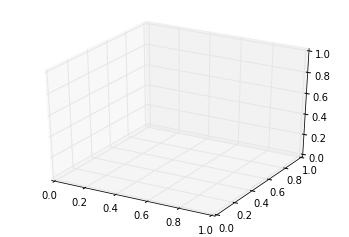

In [21]:
# Plot 100 of these:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
bundle_points = np.empty((0,3))
for bundle_idx in range(1,10):
    bundle = np.array(f[fibers[bundle_idx][0]])
    for streamline_idx in range(100):
        streamline = np.array(f[bundle[0][streamline_idx]])
        bundle_points = np.vstack((bundle_points, streamline))
#         ax.plot(streamline[:, 0], streamline[:, 1], streamline[:, 2], alpha=0.5, color='blue')

print(bundle_points)

cv = ConvexHull(bundle_points)
x = cv.points[:,0]
print (x)
y = cv.points[:,1]
z = cv.points[:,2]
ax.plot_trisurf(x, y, z, triangles=cv.simplices, alpha=0.1, color='red')

In [14]:
# Reading the data from the MRI data file is a bit more straightforward:
T1w_img = nib.load('../subject1/T1w_acpc_dc_restore_1.25.nii.gz')
T1w_data = T1w_img.get_data()

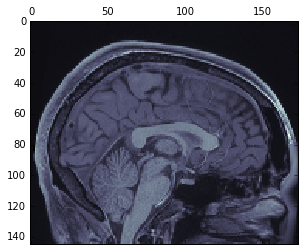

In [15]:
# This is a view through the middle of this persons head ("mid-sagittal"). 
plt.matshow(np.rot90(T1w_data[T1w_data.shape[0]//2]), cmap='bone')